In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('数据科学实践Data/Grad-NonL.xlsx', header=3)

In [3]:
data

,Mx,My,Mz,Fx,Fy,Fz,EQV1
0,-1675.390300,-1998.665230,5510.791597,788.500145,-349.840323,-749.484857,105.7
1,-2322.437772,-1103.348602,-3821.900279,-292.980661,-120.324884,-1492.282784,27.8
2,-2277.678753,3769.912655,6009.484578,449.820701,465.993458,-1133.022195,23.8
3,-2646.178051,-5351.089136,-2996.122766,-418.147969,-52.267144,-1008.130834,57.5
4,-2454.031157,4307.910081,-2168.362690,696.520361,269.906665,-1074.581064,54.0
...,...,...,...,...,...,...,...
395,-1930.330507,2420.507801,-4628.791369,-125.679311,51.758871,-480.036244,62.2
396,1140.683063,9354.797307,-8097.031004,-307.973193,-376.391115,-909.294710,105.4
397,1330.671273,56.462662,-3987.991471,611.455199,-24.008157,-592.997015,17.4
398,124.402675,-4034.131003,-2790.055049,-419.757194,-180.247416,-730.258977,72.6


In [4]:
class non_linear_regression:
    def __init__(self, data):
        self.X = data.drop(columns='EQV1').values
        X_mean, X_std = self.X.mean(0), self.X.std(0)
        self.X = (self.X - X_mean) / X_std
        self.y = data['EQV1'].values
        self.num_samples, self.num_colums = self.X.shape
        self.W, self.b = np.random.uniform(-1, 1, (self.num_colums)), np.random.uniform(-1, 1, (1))

    def get_loss(self):
        middle_var = np.dot(self.X, self.W) + self.b
        y_hat = 1 / (1 + np.exp(-middle_var))
        mse = np.sum((y_hat - self.y) ** 2) / self.num_samples
        dw = 2 * np.dot(self.X.T, (y_hat - self.y) * (y_hat * (1 - y_hat))) / self.num_samples
        db = 2 * np.sum((y_hat - self.y) * (y_hat * (1 - y_hat))) / self.num_samples
        return mse, dw, db
    
    def train(self, num_epochs, alpha):
        loss_list = []
        for _ in range(num_epochs):
            mse, dw, db = self.get_loss()
            self.W -= alpha * dw
            self.b -= alpha * db
            loss_list.append(mse)
        return loss_list

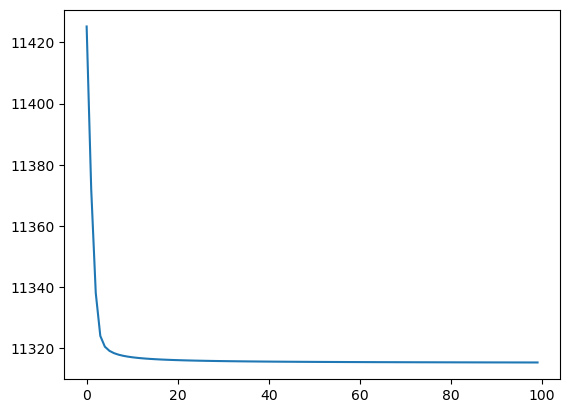

In [5]:
optimizer = non_linear_regression(data)
loss_list = optimizer.train(100, 0.05)
plt.plot(loss_list)

In [6]:
loss_list[-1], optimizer.W, optimizer.b

(11315.424289069037,
 array([ 0.06411063, -0.269307  ,  0.12307815,  0.00958391,  0.0139846 ,
        -0.00781603]),
 array([6.7227451]))

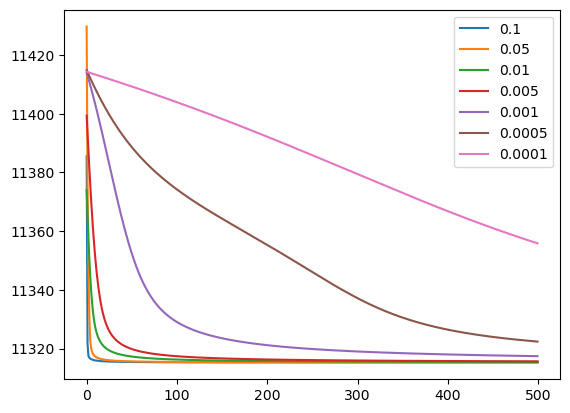

In [7]:
alpha_range = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
list_ = []

for alpha in alpha_range:
    optimizer = non_linear_regression(data)
    list_.append(optimizer.train(500, alpha))
for i, loss_list in enumerate(list_):
    plt.plot(loss_list, label=alpha_range[i])
plt.legend()
plt.show()

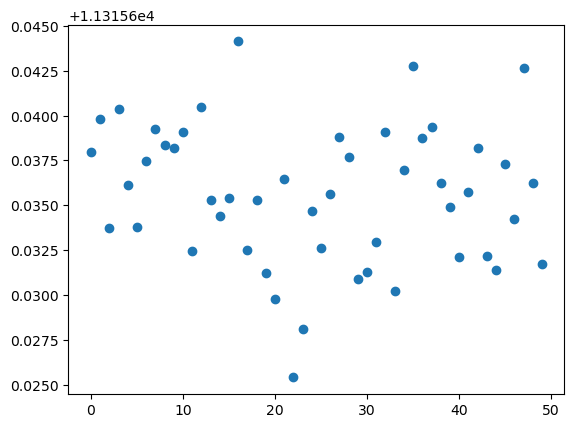

In [8]:
alpha, num_epochs = 0.005, 500
num_runs, list_ = 50, []
for _ in range(num_runs):
    optimizer = non_linear_regression(data)
    list_.append(optimizer.train(num_epochs, alpha)[-1])

plt.scatter(list(range(num_runs)), list_)

In [9]:
min(list_), optimizer.W, optimizer.b

(11315.625426345681,
 array([ 0.06662579, -0.26599014,  0.13478042, -0.00273619,  0.0400845 ,
        -0.00377358]),
 array([6.00022936]))

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def newton_method(X, y, max_iter=100, tol=1e-6):
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    for i in range(max_iter):
        y_hat = sigmoid(np.dot(X, W))

        gradient = np.dot(X.T, (y_hat - y)) / n_samples

        D = np.diag(y_hat * (1 - y_hat))
        Hessian = np.dot(np.dot(X.T, D), X) / n_samples

        if np.linalg.det(Hessian) == 0:
            print("Hessian矩阵不可逆，停止迭代。")
            break

        update = np.linalg.inv(Hessian).dot(gradient)
        W -= update

        if np.linalg.norm(update) < tol:
            print(f"在第{i}次迭代后收敛。")
            break

    return W


X = data.drop(columns='EQV1').values
X_mean, X_std = X.mean(0), X.std(0)
X = (X - X_mean) / X_std
X = np.c_[np.ones(X.shape[0]), X]

y = data['EQV1'].values
y_min = y.min()
y_max = y.max()
y = (y - y_min) / (y_max - y_min)


W = newton_method(X, y)

print("W:", W)

在第4次迭代后收敛。
W: [-0.89111325  0.15021976 -0.56355929  0.36398257  0.01637094 -0.03435915
 -0.08047252]


In [ ]:
z = np.dot(X, W)
z = z * (y_max - y_min) + y_min
y_hat = sigmoid(z)
print("mse: ", np.mean((y_hat - data['EQV1'].values) ** 2))

mse 11437.628214441953
